<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

<!-- Quelle: SS 2025 Stefan Götze Vorlage Jupyter-Notebook-->

# Modul Machine Learning,
# Abschließende Semesterarbeit
# *Prognose von Unfallhäufigkeiten mit Personenschaden mit einem Destatis Unfalldatensatz für die Jahre 2024 bis 2026*

### Sommersemester 2025
Ausgearbeitet von Karsten Matz

# Inhaltsverzeichnis

**1. Einleitung**

**2. Vorbereitung und Vorverarbeitung der Datensätze**
* 2.1 Sammeln von Rohdaten
* 2.2 Datenbeschreibung
* 2.3 Datenbereinigung und Datenvorverarbeitung

**3. Datenanalyse und Visualisierung**
* 3.1 Aggregation der Daten
* 3.2 Visualisierung der Zeitreihe

**4. Anwendung und Training von ML-Algorithmen (Zeitreihenmodelle)**
* 4.1 SARIMA Modellierung
* 4.2 SARIMA Modelloptimierung

**5. Prognose der Unfallhäufigkeit**
* 5.1 Prognoseerstellung für 2024-2026
* 5.2 Visualisierung der Prognose

**6. Fazit und Ausblick**

# 1. Einleitung

Als Abschluss des Moduls Machine Learning erstelle ich ein Machine Learning Projekt. Die Umsetzung erfolgt in einem Jupyter-Notebook mit `Pandas` und `Scikit-learn` und `Matplotlib`. Hier werden die erlernten Kenntnisse in Datenanalyse und Visualisierung und den entsprechenden Machine Learning Methoden umgesetzt.

Durch den betreuenden Dozenten Prof. Dr. Stefan Götze wurden vorgegebene Themen für die Durchführung der Semesterarbeit zur Verfügung gestellt. Es war aber auch möglich ein selbstgewähltes Thema für ein Machine Learning Projekt zu wählen.

Ich habe mich dazu entschieden Unfalldaten zu analysieren und für die Prognose  der Unfallhäufigkeit für die Jahre 2024 bis 2026 ein Vorhersagemodelle zu trainieren.
Die Motivation für dieses Thema habe ich durch Medienberichte über Unfallhäufigkeit und Anzahl der Unfälle mit Personenschaden erhalten.

Eine wesentliche Erkenntnis dieser Ausarbeitung ist, dass sich für Zeitreihendaten, wie im vorliegenden Unfalldatensatz die dafür vorgesehen Zeitreihen-Modelle am Besten eignen. Klasssiche Regressionsmodelle kommen an diese Leistungsfähigkeit hinsichtlich der Vorhersagegüte nicht heran.

Die Semesterarbeit ist auf 4000 Wörter Markdown begrenzt. Um dies zu überprüfen hilft der folgende Code. Hier werden die Markdown-Zellen in einem Jupyter-Notebook nach der Anzahl der Wörter überprüft.

In [3]:
import nbformat

with open('MLSemestarbeitUnfallstatistikLinV2.ipynb', 'r', encoding='utf-8') as f:
   nb = nbformat.read(f, as_version=4)

wortanzahl = 0
for cell in nb.cells:
   if cell.cell_type == "markdown":
      text = cell['source']
      wortanzahl += len(text.split())
print(wortanzahl) 

2831


# 2. Vorbereiten der Datensätze
## 2.1 Sammeln der Rohdaten

Als Datengrundlage habe ich einen Datensatz gewählt, der für die Anwendung des Unfallaltas des statistischen Bundesamtes (Destatis) erstellt wurde.
Meinen Datensatz als zusammenhängender und schon sehr vollständiger Datensatz habe ich von der Mitfahrzentrale.
https://data.mfdz.de/destatis_Unfalldaten/
Dieser Datensatz ist öffentlich zugänglich und darf frei verwendet werden.

Der Unfallatlas beschäftigt sich mit der Unfallhäufigkeit bezogen auf Geodaten
Hier findet man die Kartenanwendung des Unfallatlas.
Quelle: https://unfallatlas.statistikportal.de/

![Unfallatlas.png](https://github.com/CinciLima/ML_Projekt/raw/4dbf2e9097054e252de6fe0759ac143c9fb115b6/ressources/Unfallatlas.png)
*Abbildung 1: Unfallatlas von DESTATIS*

Eine weitere Online-Anwendung ist der Unfallkalender, der sich mit der Unfallhäufigkeit bezogen auf Kalenderdaten auseinandersetzt, z.B Unfälle unter Alkoholeinfluss sind besonders oft am Wochende anzutreffen.
Die Anwendung findet man unter folgendem Link: https://service.destatis.de/DE/verkehrsunfallkalender/


![Unfallkalender.png](https://github.com/CinciLima/ML_Projekt/raw/4dbf2e9097054e252de6fe0759ac143c9fb115b6/ressources/Unfallkalender.png)

*Abbildung 2: Unfallkalender von DESTATIS*

Über die Genesis Online-Datenbank von Destatis hat man Zugriff auf Daten der Straßenverkehrsunfälle. Link: https://www-genesis.destatis.de/datenbank/online/statistic/46241/details/search/s/c3RyYSVDMyVBRkVudmVya2Vocg==/filter/JTdCJTIyY29kZSUyMiUzQSUyMjQ2MjQxJTIyJTdE

Mit einem kostenlosen Konto von Genesis Online kann man die Datenbank über eine Schnittstelle (REST-API) für eigene Anwendungen nutzen.

## 2.2 Datenbeschreibung
Zur Beschreibung der Merkmale des Unfalldatensatzes gibt es online eine pdf-Datei unter folgendem Link:

Datenbeschreibung Unfallatlas https://www.opengeodata.nrw.de/produkte/transport_verkehr/unfallatlas/DSB_Unfallatlas.pdf

Ich habe die Beschreibung der Merkmale in einer Tabelle zusammengefasst.

| Merkmal       | Beschreibung                                      | Wertebereich / Kategorien                          | Bemerkungen                                                                 |
|---------------|---------------------------------------------------|----------------------------------------------------|------------------------------------------------------------------------------|
| **UJAHR**     | Unfalljahr                                        | 2016–2023                                          | Datenverfügbarkeit je Bundesland unterschiedlich                            |
| **AGS**       | Amtlicher Gemeindeschlüssel                       | Ziffernfolge                                        | Erste 2 Ziffern = Bundesland (01–16), danach Regierungsbezirk, Kreis, Gemeinde |
| **UMONAT**    | Monat des Unfalls                                 | 1–12                                               | 1 = Januar, 12 = Dezember                                                    |
| **USTUNDE**   | Stunde des Unfalls                                | 0–23                                               | Volle Stundenangabe                                                          |
| **UWOCHENTAG**| Wochentag des Unfalls                             | 1–7                                                | 1 = Sonntag, 7 = Samstag                                                     |
| **UKATEGORIE**| Schwere der Unfallfolge                           | 1–3                                                | 1 = Getötete, 2 = Schwerverletzte, 3 = Leichtverletzte                      |
| **UART**      | Unfallart                                         | 0–9                                                | z. B. 1 = Zusammenstoß mit ruhendem Fahrzeug, 6 = Fahrzeug/Fußgänger         |
| **UTYP1**     | Unfalltyp                                         | 1–7                                                | z. B. 1 = Fahrunfall, 4 = Überschreiten-Unfall                               |
| **ULICHTVERH**| Lichtverhältnisse                                 | 0–2                                                | 0 = Tageslicht, 1 = Dämmerung, 2 = Dunkelheit                                |
| **USTRZUSTAND**| Straßenzustand                                   | 0–2                                                | 0 = trocken, 1 = nass, 2 = winterglatt                                       |
| **IstRad**    | Beteiligung von Radfahrern                        | False oder True                                           | 1 = mindestens ein Radfahrer beteiligt                                       |
| **IstPKW**    | Beteiligung von Pkw                               | False oder True                                           |                                                                              |
| **IstFuss**   | Beteiligung von Fußgängern                        | False oder True                                           |                                                                              |
| **IstKrad**   | Beteiligung von Krafträdern                       | False oder True                                           | Mofa, Motorrad, Motorroller                                                  |
| **IstGkfz**   | Beteiligung von Güterkraftfahrzeugen              | False oder True                                           | Lkw über 3,5 t                                                               |
| **IstSonstige**| Beteiligung sonstiger Verkehrsteilnehmer        | False oder True                                           |                                                                              |
| **LON**       | Längengrad                                        | Dezimalwert                                        | Geokoordinate des Unfallorts                                                 |
| **LAT**       | Breitengrad                                       | Dezimalwert                                        | Geokoordinate des Unfallorts                                                 |

Grundbegriffe der Verkehrsunfallstatistik, eine weitere pdf-Datei zum Herunterladen.
Diese Datei enthält noch detailiertere Beschreibung zu den Unfallmerkmalen
https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Verkehrsunfaelle/Methoden/verkehrsunfaelle-grundbegriffe.pdf?__blob=publicationFile&v=6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request

url = "https://github.com/CinciLima/ML_Projekt/\
raw/refs/heads/main/ressources/body.parquet"
datei = "./body.parquet"

if not os.path.isfile(datei):
  urllib.request.urlretrieve(url, datei)

dfUnfallGesamt = pd.read_parquet(datei, engine='pyarrow')
dfUnfallGesamt.describe(include ='all')

,UJAHR,AGS,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,STRZUSTAND,LON,LAT
count,1.823882e+06,1823882,1.823882e+06,1.823882e+06,1.823882e+06,1.823882e+06,1.823882e+06,1.823882e+06,1.823882e+06,1823882,1823882,1823882,1823882,1628653,1823882,1.823882e+06,1.823882e+06,1.823882e+06
unique,NaN,11269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,NaN,NaN,NaN
top,NaN,09162000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN
freq,NaN,38804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289199,1423348,1664384,1569843,1549816,1617411,NaN,NaN,NaN
mean,2.019818e+03,NaN,6.766264e+00,1.331955e+01,4.102718e+00,2.797314e+00,3.887732e+00,3.822510e+00,4.315312e-01,NaN,NaN,NaN,NaN,NaN,NaN,2.803986e-01,9.865222e+00,5.071910e+01
std,2.211505e+00,NaN,3.209482e+00,4.784681e+00,1.869973e+00,4.259810e-01,2.616989e+00,2.145946e+00,7.895578e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.962345e-01,2.071019e+00,1.837882e+00
min,2.016000e+03,NaN,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,5.867262e+00,4.731555e+01
25%,2.018000e+03,NaN,4.000000e+00,1.000000e+01,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,8.291415e+00,4.914172e+01
50%,2.020000e+03,NaN,7.000000e+00,1.400000e+01,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,9.689042e+00,5.081220e+01
75%,2.022000e+03,NaN,9.000000e+00,1.700000e+01,6.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.147827e+01,5.226603e+01


In [5]:
dfUnfallGesamt.head()

,UJAHR,AGS,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,STRZUSTAND,LON,LAT
0,2016,01053120,1,9,5,2,8,1,0,False,True,False,False,False,False,2,10.621659,53.729615
1,2016,01057010,1,17,3,3,1,6,2,False,True,False,False,False,False,1,10.149176,54.245453
2,2016,01062008,1,0,5,3,9,7,2,False,True,False,False,False,False,0,10.518094,53.820403
3,2016,01003000,1,15,5,3,5,3,0,True,False,False,False,False,True,0,10.683021,53.851243
4,2016,01055028,1,14,1,3,8,1,0,False,True,False,False,False,False,2,10.620986,54.219459


Die Parquet-Datei wurde hochgeladen und in Pandas in einen Dataframe dfUnfallGesamt gespeichert.

Mit der Funktion `describe()` werden die deskriptiven, statistischen Eigenschaften des Datensatzes angezeigt. Mit include = 'all' werden auch die nicht-numerischen Merkmale angezeigt.
Alle Merkmale haben dieselbe Anzahl (count) an Zeilen. Daher kann man davon ausgehen, das der Datensatz vollständig ist.

Bei den zyklischen Datums- und Zeitmerkmalen, die einfach mit einer Ganzzahl-Encodierung durchnummeriert wurden, kann dies problematisch sein. Z.B UMONAT, USTUNDE. Hier geht die zyklische Natur dieser Merkmale verloren, was hinterher im Modell zu Fehlinterpretationen führen kann. Entsprechend werden diese Merkmale später transformiert.

Die boolschen Merkmale wie IstFuss, IstPKW für die Unfallbeteiligten sind insofern problematisch, da die Machine Learning Modelle, die später eingesetzt werden, vektorbasierte Berechnungen durchführen. Hier würde sich eine One-Hot Encodierung anbieten, wobei die boolschen Werte die Zahlen 0 oder 1 annehmen können.

Für die Ausgabe der Spaltennamen und Datentypen der Spalten wird die Funktion `info()` benutzt.

In [3]:
dfUnfallGesamt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823882 entries, 0 to 1823881
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   UJAHR       int16  
 1   AGS         object 
 2   UMONAT      uint8  
 3   USTUNDE     uint8  
 4   UWOCHENTAG  uint8  
 5   UKATEGORIE  uint8  
 6   UART        uint8  
 7   UTYP1       uint8  
 8   ULICHTVERH  uint8  
 9   IstRad      bool   
 10  IstPKW      bool   
 11  IstFuss     bool   
 12  IstKrad     bool   
 13  IstGkfz     object 
 14  IstSonstig  bool   
 15  STRZUSTAND  int64  
 16  LON         float64
 17  LAT         float64
dtypes: bool(5), float64(2), int16(1), int64(1), object(2), uint8(7)
memory usage: 93.9+ MB


Hier sieht man, über Range Index und entries, dass der Datensatz über 1,8 Millionen Datenpunke hat. Überall dort wo die reinen Ganzzahldatentypen (uint8, int16, int64) bzw. die Gleitkommdatentypen float 64 und boolsche Datentypen haben wir "saubere" Spalten. Hier befinden sich keine Null-Werte oder Zeichenketten

Die Spalten vom Datentyp object enthalten Zeichenketten und, oder Null-Werte. Besonders IstGkfz ist nicht sauber. Diese Spalte beschreibt die Beteiligung von Güterverkehrkraftfahrzeugen und sollte vom Typ Boolean sein.

Über die Funktion `isna()` werden nicht vorhandene Datenpunkte angezeigt und mit der Funktion `sum()` aggregiert, ausgezählt.

In [4]:
dfUnfallGesamt.isna().sum()

UJAHR              0
AGS                0
UMONAT             0
USTUNDE            0
UWOCHENTAG         0
UKATEGORIE         0
UART               0
UTYP1              0
ULICHTVERH         0
IstRad             0
IstPKW             0
IstFuss            0
IstKrad            0
IstGkfz       195229
IstSonstig         0
STRZUSTAND         0
LON                0
LAT                0
dtype: int64

Das Ergebnis zeigt, das `195229` Datenpunkte im Merkmal IstGkfz fehlen.

`AGS` der allgemeine Gemeindeschlüssel ist auch vom Typ object. Diese Spalte enthält die Gemeindeschlüssel als Zeichenkette, vom Typ String. Folgender Code überprüft dies

In [5]:
type(dfUnfallGesamt['AGS'][0])

str

<Axes: xlabel='IstGkfz'>

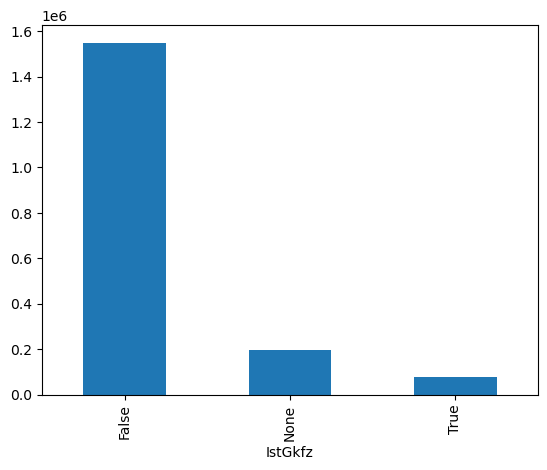

In [6]:
# Anzeige der Werte, die sich in IstGkfz befinden, auch fehlende Werte
dfUnfallGesamt['IstGkfz'].value_counts(dropna=False).plot(kind='bar')

Es gibt unterschiedliche Methoden, um mit fehlenden Werten umzugehen.

Um eine gute Entscheidung zu treffen, muss der Gesamtzusammenhang klar sein. Hierzu müssen die fehlenden Werte mit anderen Spalten verglichen werden

In [7]:
dfUnfallGesamt[dfUnfallGesamt['IstGkfz'].isna()]

,UJAHR,AGS,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,STRZUSTAND,LON,LAT
151673,2017,01055012,1,5,6,2,9,1,2,False,True,False,False,None,False,2,10.609031,54.153150
151674,2017,01060053,1,6,6,3,6,2,2,False,False,True,False,None,True,1,10.251498,53.865551
151675,2017,01061011,1,18,6,3,7,7,2,False,True,False,False,None,False,1,9.348344,54.062897
151676,2017,01055042,1,12,7,3,5,3,0,True,True,False,False,None,False,0,10.770405,53.969302
151677,2017,01062060,1,8,6,3,2,6,0,False,True,False,False,None,False,1,10.231475,53.556684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346897,2017,10041100,12,8,3,3,0,1,0,False,False,False,False,None,True,0,6.978149,49.241166
346898,2017,10045114,12,15,2,3,5,3,0,False,True,False,False,None,False,1,7.340207,49.316969
346899,2017,10041100,12,18,2,3,3,6,2,False,True,False,False,None,True,1,6.987211,49.240583
346900,2017,10045114,12,17,1,3,2,6,2,False,True,False,False,None,False,1,7.335078,49.336158


Es fällt auf, dass nur Datenpunkte aus dem `Jahr 2017` betroffen sind. 

Die ersten 5 Datenpunkte und die letzten 5 Datenpunkte werden angezeigt.

Wie sieht der Vergleich zu den anderen Jahren aus? Der folgende Code holt die Daten aus den Jahren 2016 bis 2019 und zählt für `IstGkfz` die Werte in diesen Jahren.

In [8]:
# Filtern des DataFrames für die Jahre 2016, 2017, 2018 und 2019
df16_17_18_19 = dfUnfallGesamt[dfUnfallGesamt['UJAHR'].isin([2016, 2017, 2018, 2019])]

# Anzeigen der Verteilung von 'IstGkfz' für 2017, 2018 und 2019, einschließlich fehlender Werte
print("Verteilung von 'IstGkfz' für das Jahr 2016:")
display(df16_17_18_19[df16_17_18_19['UJAHR'] == 2016]['IstGkfz'].value_counts(dropna=False))

print("Verteilung von 'IstGkfz' für das Jahr 2017:")
display(df16_17_18_19[df16_17_18_19['UJAHR'] == 2017]['IstGkfz'].value_counts(dropna=False))

print("Verteilung von 'IstGkfz' für das Jahr 2018:")
display(df16_17_18_19[df16_17_18_19['UJAHR'] == 2018]['IstGkfz'].value_counts(dropna=False))

print("\nVerteilung von 'IstGkfz' für das Jahr 2019:")
display(df16_17_18_19[df16_17_18_19['UJAHR'] == 2019]['IstGkfz'].value_counts(dropna=False))

Verteilung von 'IstGkfz' für das Jahr 2016:


IstGkfz
False    143717
True       7956
Name: count, dtype: int64

Verteilung von 'IstGkfz' für das Jahr 2017:


IstGkfz
None    195229
Name: count, dtype: int64

Verteilung von 'IstGkfz' für das Jahr 2018:


IstGkfz
False    200847
True      11021
Name: count, dtype: int64


Verteilung von 'IstGkfz' für das Jahr 2019:


IstGkfz
False    254913
True      13457
Name: count, dtype: int64

Das `Ergebnis` zeigt, dass `für das Merkmal IstGkfz die Datenpunkte für 2017 komplett fehlen`. 

Etwas anschaulicher läßt sich der Sachverhalt in einem Balkendiagramm darstellen.

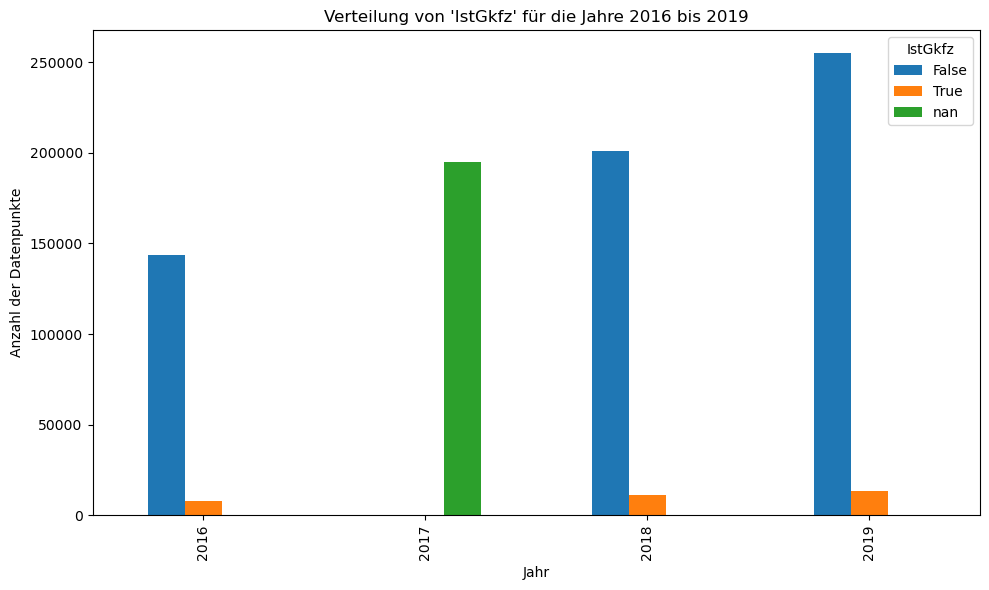

In [9]:
# Zählung der Werte in 'IstGkfz' pro Jahr
counts = df16_17_18_19.groupby(['UJAHR'])['IstGkfz'].value_counts(dropna=False).unstack(fill_value=0)

# Balkendiagramm erstellen
counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Verteilung von 'IstGkfz' für die Jahre 2016 bis 2019")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Datenpunkte")
plt.legend(title="IstGkfz")
plt.tight_layout()
#plt.savefig("IstGkfz_Verteilung_2016_2019.png")
plt.show()

## 2.3 Datenbereinigung und Datenvorverarbeitung

Es muss entschieden werden, wie mit den fehlenden Daten umzugehen ist, um den Datensatz zu homogeniseren und für ML-Modelle vorzubereiten.
Aufgrund meiner Analyse habe ich mich entschieden die fehlenden Werte zu imputieren. Das Merkmal IstGkfz wird auf Basis der Daten von 2016, 2018 und 2019 ergänzt. Hierfür verwende ich die Funktion `mode()`.

Für `zyklische Merkmale` wie Monat und Stunde wird eine `Transformation mit trigonometrischen Funktionen (sin, cos)` durchgeführt. So bleibt der zyklische Charakter dieser Zeit- und Datumsmerkmale erhalten. Für die übrigen kategorischen Merkmale UKATEGORIE, UART, UTYP1, ULICHTVERH und STRZUSTAND wird eine `One-Hot-Encodierung` durchgeführt. Es sind `nominale kategorische Merkmale`, die keine natürliche Reihenfolge besitzen. Eine Ganzzahl-Encodierung wäre hier die falsche Wahl, da nur ordinal kategorische Merkmale so tranformiert werden, die eine natürliche Reihenfolge bzw. ein Hierachie besitzen.

In [10]:
# Berechnet den Zustand von 'IstGkfz' für die Jahre 2016, 2018, and 2019
mode_istgkfz = df16_17_18_19[df16_17_18_19['UJAHR'].isin([2016, 2018, 2019])]['IstGkfz'].mode()[0]

# Füllt die fehlenden Wert in 'IstGkfz' für das Jahr 2017 mit den berechneten Werten 
#dfUnfallGesamt.loc[dfUnfallGesamt['UJAHR'] == 2017, 'IstGkfz'] = dfUnfallGesamt.loc[dfUnfallGesamt['UJAHR'] == 2017, 'IstGkfz'].fillna(mode_istgkfz)
dfUnfallGesamt.loc[(dfUnfallGesamt['UJAHR'] == 2017) & (dfUnfallGesamt['IstGkfz'].isna()), 'IstGkfz'] = mode_istgkfz

# Konvertiert 'IstGkfz' zum Typ boolean nachdem die fehlenden Werte hinzugefügt wurden
dfUnfallGesamt['IstGkfz'] = dfUnfallGesamt['IstGkfz'].astype(bool)

# Erstellen von Sinus- und Cosinus-Transformationen für UMONAT und USTUNDE
dfUnfallGesamt['UMONAT_sin'] = np.sin(2 * np.pi * dfUnfallGesamt['UMONAT'] / 12)
dfUnfallGesamt['UMONAT_cos'] = np.cos(2 * np.pi * dfUnfallGesamt['UMONAT'] / 12)
dfUnfallGesamt['USTUNDE_sin'] = np.sin(2 * np.pi * dfUnfallGesamt['USTUNDE'] / 24)
dfUnfallGesamt['USTUNDE_cos'] = np.cos(2 * np.pi * dfUnfallGesamt['USTUNDE'] / 24)

# Erstellen einer Liste mit den Spalten der kategorischen Merkmale für die One-Hot-Encodierung
categorical_cols = ['UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'STRZUSTAND']

# Erstellen der One-Hot-Encodierung
dfUnfallGesamt = pd.get_dummies(dfUnfallGesamt, columns=categorical_cols, drop_first=True)

# Ausgabe der ersten Zeilen des neuen DataFrames und die Info über Spaltennamen und Datentypen
display(dfUnfallGesamt.head())
dfUnfallGesamt.info()

,UJAHR,AGS,UMONAT,USTUNDE,UWOCHENTAG,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,...,UTYP1_2,UTYP1_3,UTYP1_4,UTYP1_5,UTYP1_6,UTYP1_7,ULICHTVERH_1,ULICHTVERH_2,STRZUSTAND_1,STRZUSTAND_2
0,2016,01053120,1,9,5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2016,01057010,1,17,3,False,True,False,False,False,...,False,False,False,False,True,False,False,True,True,False
2,2016,01062008,1,0,5,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,2016,01003000,1,15,5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2016,01055028,1,14,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823882 entries, 0 to 1823881
Data columns (total 38 columns):
 #   Column        Dtype  
---  ------        -----  
 0   UJAHR         int16  
 1   AGS           object 
 2   UMONAT        uint8  
 3   USTUNDE       uint8  
 4   UWOCHENTAG    uint8  
 5   IstRad        bool   
 6   IstPKW        bool   
 7   IstFuss       bool   
 8   IstKrad       bool   
 9   IstGkfz       bool   
 10  IstSonstig    bool   
 11  LON           float64
 12  LAT           float64
 13  UMONAT_sin    float64
 14  UMONAT_cos    float64
 15  USTUNDE_sin   float64
 16  USTUNDE_cos   float64
 17  UKATEGORIE_2  bool   
 18  UKATEGORIE_3  bool   
 19  UART_1        bool   
 20  UART_2        bool   
 21  UART_3        bool   
 22  UART_4        bool   
 23  UART_5        bool   
 24  UART_6        bool   
 25  UART_7        bool   
 26  UART_8        bool   
 27  UART_9        bool   
 28  UTYP1_2       bool   
 29  UTYP1_3       bool   
 30  UTYP1_4       bool

### Feature Engineering

Beim Feature Engineering werden `neue Merkmale` erstellt, die für die Vorhersage der Unfallhäufigkeit relevant sein könnten.

Zuerst erstelle ich einen `Zeitstempel` aus den vorhandenen Datums- und Zeitinformationen. Hierzu nutze ich die Funktion `to_datetime()`, die Listen, String, Series in Datetime-Objekte konvetiert. Da es hier um Zeitreiheninformation geht, können zeitliche Trends als Muster besser erkannt werden. Außerdem werden später Aggregationen erleichtert.


In [11]:
# Kombinieren von UJAHR, UMONAT, USTUNDE und UWOCHENTAG zu einem Zeitstempel
# UWOCHENTAG wird hier nicht direkt für den Zeitstempel verwendet,
# da der Wochentag bereits im Datum enthalten ist.
# Es wird ein temporäres Datum erstellt, da die genaue Tagesinformation fehlt.
# Für die Vorhersage der Häufigkeit pro Jahr oder Monat ist dies ausreichend.
dfUnfallGesamt['timestamp'] = pd.to_datetime(dfUnfallGesamt['UJAHR'].astype(str) + '-' +
                                             dfUnfallGesamt['UMONAT'].astype(str) + '-' +
                                             '01 ' + # Temporärer Tag, da nicht im Datensatz
                                             dfUnfallGesamt['USTUNDE'].astype(str) + ':00:00',
                                             errors='coerce')

# Überprüfen auf fehlende Zeitstempel nach der Konvertierung
print("Anzahl der fehlenden Zeitstempel:", dfUnfallGesamt['timestamp'].isna().sum())

# Anzeigen der ersten Zeilen mit dem neuen Zeitstempel
display(dfUnfallGesamt[['UJAHR', 'UMONAT', 'USTUNDE', 'timestamp']].head())

Anzahl der fehlenden Zeitstempel: 0


,UJAHR,UMONAT,USTUNDE,timestamp
0,2016,1,9,2016-01-01 09:00:00
1,2016,1,17,2016-01-01 17:00:00
2,2016,1,0,2016-01-01 00:00:00
3,2016,1,15,2016-01-01 15:00:00
4,2016,1,14,2016-01-01 14:00:00


# 3. Datenanalyse und Visualisierung

## 3.1 Aggregation der Daten

Es stellt sich nun die Frage, wie die `Daten aggregiert` werden können, um die Unfallhäufigkeit zu erhalten.

Da das `Ziel die Vorhersage der Unfallhäufigkeit mit Personenschaden (UKATEGORIE 1 und 2)` ist, können die Daten nach Zeiträumen (z.B. Monat oder Jahr) und gegebenenfalls Regionen aggregiert werden und die Anzahl der Unfälle mit Personenschaden gezählt werden.

In [12]:
# Filtern der Daten, um nur Unfälle mit Personenschaden (UKATEGORIE 1 oder 2) zu berücksichtigen
dfUnfallPersonenschaden = dfUnfallGesamt[dfUnfallGesamt['UKATEGORIE_2'].isin([True]) | dfUnfallGesamt['UKATEGORIE_3'].isin([True])].copy()


# Extrahieren von Jahr und Monat aus dem Zeitstempel für die Gruppierung
dfUnfallPersonenschaden['Jahr_Monat'] = dfUnfallPersonenschaden['timestamp'].dt.to_period('M')

# Gruppieren nach Jahr und Monat und Zählen der Unfälle
unfall_monatlich = dfUnfallPersonenschaden.groupby('Jahr_Monat').size().reset_index(name='Anzahl_Unfaelle')

# Anzeigen der ersten Zeilen des aggregierten DataFrames
display(unfall_monatlich.head())

# Anzeigen der letzten Zeilen des aggregierten DataFrames
display(unfall_monatlich.tail())

,Jahr_Monat,Anzahl_Unfaelle
0,2016-01,9791
1,2016-02,8895
2,2016-03,10051
3,2016-04,12094
4,2016-05,13740


,Jahr_Monat,Anzahl_Unfaelle
91,2023-08,24525
92,2023-09,28905
93,2023-10,23744
94,2023-11,21319
95,2023-12,17221


Die Ausgabe ist ein `aggregierter DataFrame mit 96 Datenpunkten`. 

Der ursprüngliche Datensatz hatte über 1,8 Millionen Datenpunkte. Dies erleichter das Vorhaben später ML-Modelle zu trainieren erheblich.

## 3.2 Visualisierung der Zeitreihe

Zur Visualisierung wird die Jahr_Monat Spalte in einen `Datetime-Index` konvertiert

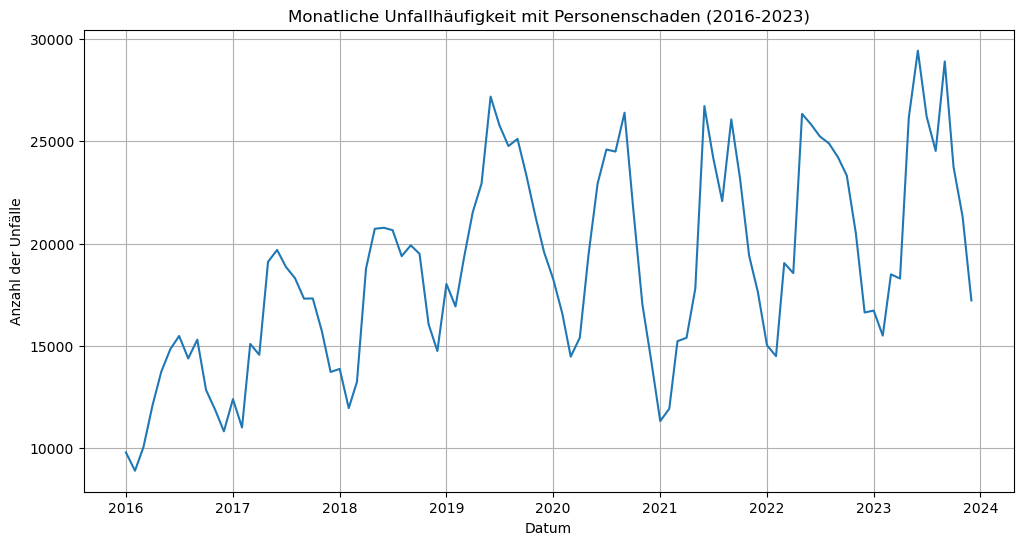

In [13]:
import matplotlib.pyplot as plt

# Konvertieren der 'Jahr_Monat'-Spalte in einen Datetime-Index für die Visualisierung
unfall_monatlich['Jahr_Monat'] = unfall_monatlich['Jahr_Monat'].dt.to_timestamp()
unfall_monatlich = unfall_monatlich.set_index('Jahr_Monat')

# Plotten der monatlichen Unfallhäufigkeit
plt.figure(figsize=(12, 6))
plt.plot(unfall_monatlich.index, unfall_monatlich['Anzahl_Unfaelle'])
plt.title('Monatliche Unfallhäufigkeit mit Personenschaden (2016-2023)')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Unfälle')
plt.grid(True)
plt.show()

# 4. Anwendung und Training von ML-Algorithmen (Zeitreihenmodelle)

### Datenvorbereitung für die Modellierung

Nun bereiten wir die aggregierten monatlichen Daten für die `Zeitreihenvorhersage` vor. 

Die Zielvariable ist die `Anzahl_Unfaelle`. 
Ich werde die Zeitreihe selbst als Feature verwenden, indem ich `verzögerte Werte (lag features)` erstelle.

Es werden die letzten 12 Monate als Features zur Vorhersage des nächsten Monats verwendet. Lag Features eignen sich für Vorhersagen mit historischen Daten und zyklischen, saisonalen Zusammenhängen. Der Verlauf des Diagramms bestätigt diese Zusammenhänge. Daher habe ich mich zu diesen Schritt zur Verarbeitung der Zeitreihen entschieden.

In [14]:
# Erstellen von verzögerten Features (Lag Features)
# Die letzten 12 Monate als Features zur Vorhersage des nächsten Monats.
for i in range(1, 13):
    unfall_monatlich[f'lag_{i}'] = unfall_monatlich['Anzahl_Unfaelle'].shift(i)

# Entfernen von Zeilen mit fehlenden Werten, die durch die Lag-Features entstehen
unfall_monatlich.dropna(inplace=True)

# Definieren der Features (X) und der Zielvariable (y)
X = unfall_monatlich.drop('Anzahl_Unfaelle', axis=1)
y = unfall_monatlich['Anzahl_Unfaelle']

# Anzeigen der ersten Zeilen des vorbereiteten DataFrames
display(unfall_monatlich.head())

,Anzahl_Unfaelle,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Jahr_Monat,,,,,,,,,,,,,
2017-01-01,12395,10821.0,11878.0,12843.0,15301.0,14384.0,15481.0,14843.0,13740.0,12094.0,10051.0,8895.0,9791.0
2017-02-01,11009,12395.0,10821.0,11878.0,12843.0,15301.0,14384.0,15481.0,14843.0,13740.0,12094.0,10051.0,8895.0
2017-03-01,15093,11009.0,12395.0,10821.0,11878.0,12843.0,15301.0,14384.0,15481.0,14843.0,13740.0,12094.0,10051.0
2017-04-01,14562,15093.0,11009.0,12395.0,10821.0,11878.0,12843.0,15301.0,14384.0,15481.0,14843.0,13740.0,12094.0
2017-05-01,19109,14562.0,15093.0,11009.0,12395.0,10821.0,11878.0,12843.0,15301.0,14384.0,15481.0,14843.0,13740.0


Als nächstes teile ich die `Daten in Trainings- und Testdatensätze` auf. 

Da es sich um Zeitreihendaten handelt, ist es wichtig, die `Daten chronologisch aufzuteilen`. 
Ich werde die letzten Monate als Testdatensatz verwenden.

In [15]:
# Aufteilung der Daten in Trainings- und Testdatensätze
# Wir verwenden einen Teil der Daten als Trainingsdaten und den Rest als Testdaten.
# Ein gängiger Ansatz bei Zeitreihen ist, die letzten Datenpunkte als Testset zu verwenden.
train_size = int(len(unfall_monatlich) * 0.8) # 80% der Daten für das Training
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print("Aufteilung Trainingsdaten (X_train):", X_train.shape)
print("Aufteilung Testdaten (X_test):", X_test.shape)
print("Aufteilung Trainingsdaten (y_train):", y_train.shape)
print("Aufteilung Testdaten (y_test):", y_test.shape)

Aufteilung Trainingsdaten (X_train): (67, 12)
Aufteilung Testdaten (X_test): (17, 12)
Aufteilung Trainingsdaten (y_train): (67,)
Aufteilung Testdaten (y_test): (17,)


### Modelltraining: Lineare Regression

Als einfaches Modell verwende ich zunächst die lineare Regression, um auf den `Trainingsdaten zu trainieren`. Die lineare Regression eignet sich für viele Vorhersage-Anwendungsfälle mit linearen Zusammenhängen.

Um die Auswertung der Modelle zu vereinfachen, verwende ich folgende Funktion `eval_model(mode, X_test, y_test)`

Diese Funktion berechnet aus dem Modelltraining den `mittlern Fehler (MAE)`, den `prozentualen Fehler` und den `R2-Score`.

Der R2-Score legt fest, wie gut das Modell zu den Testdaten passt. Die Vorhersagen auf dem Testdatensatz werden hier auch ausgeführt.

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

def eval_model(model, X_test, y_test):
    """
    Bewertet ein beliebiges Regressionsmodell für die Unfallvorhersage.
    Gibt mittleren Fehler (MAE), prozentualen Fehler und R² aus.
    """
    avg_unfaelle = y_test.mean() if hasattr(y_test, "mean") else np.mean(y_test)
    print(f"Mittlere Anzahl Unfälle im Testset: {avg_unfaelle:.2f}")
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    mae_pc = mae * 100 / avg_unfaelle if avg_unfaelle != 0 else float('nan')
    print(f"Im Mittel liegt die Schätzung um {mae:.2f} Unfälle oder {mae_pc:.1f}% daneben (R²={r2:.3f})")

In [17]:
from sklearn.linear_model import LinearRegression

# Initialisieren und Trainieren der Linearen Regression
lin_reg = LinearRegression().fit(X_train, y_train)


# Bewertung des Modells
eval_model(lin_reg, X_test, y_test)

Mittlere Anzahl Unfälle im Testset: 22122.71
Im Mittel liegt die Schätzung um 2065.78 Unfälle oder 9.3% daneben (R²=0.665)


Der `R2-Score` bedeutet, das `66 % der Varianz der Zielvariable`, die Unfallhäufigkeit mit Personenschaden durch das lineare Regressionsmodell erklärt werden.
Die ist ein brauchbares Ergebnis. Gute Ergebnisse liegen bei 80 % bis 90 %.

Wie sich an den monatlichen Unfallzahlen im Diagramm erkennen lässt, gibt es eine hohe Volatilität. Dennoch sollten sich Lag Features eignen, wenn die Schwankungen zyklisch und saisonal sind. Dies hier der Fall ist.

Um zu prüfen, ob die Lag Features einen Mehrwert bieten, wird die `Autokorrelation (ACF)` der Zeitreihe verwendet.

<Figure size 1200x600 with 0 Axes>

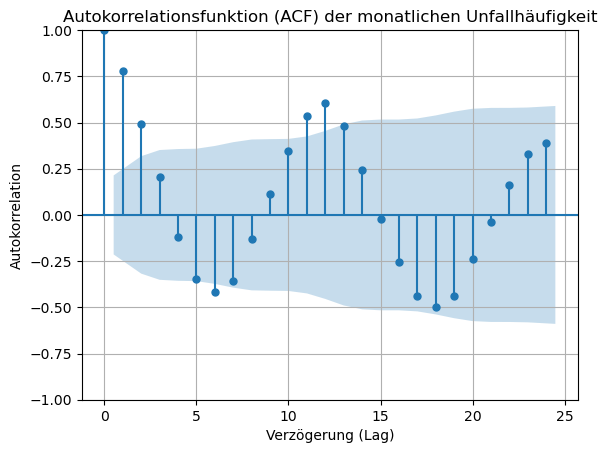

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Erstellen eines Autokorrelationsplots (ACF-Plot)
plt.figure(figsize=(12, 6))
plot_acf(unfall_monatlich['Anzahl_Unfaelle'], lags=24) # Wir betrachten die ersten 24 Verzögerungen (Lags)
plt.title('Autokorrelationsfunktion (ACF) der monatlichen Unfallhäufigkeit')
plt.xlabel('Verzögerung (Lag)')
plt.ylabel('Autokorrelation')
plt.grid(True)
plt.show()

Hier gibt es `signifikante positive Autokorrelationen` bei den ersten Verzögerungen und auch `saisonale Muster` sind zu erkennen.

Besonders die Werte bei Lag 12 und 24 lassen eine `jährliche Saisonalität` erkennen.

### Modelltraining mit zusätzlichen Zeitreihen-Features und RandomForest

Ich werde nun `zusätzliche Zeitreihen-Features` erstellen und ein Machine-Learning-Modell wie `RandomForest` verwenden.

Die Idee ist Monat und Jahr als seperate Features zu verwenden. 
RandomForest sollte sich besser eignen als ein lineares Regressionsmodell, da hier auch zufällige nicht-lineare Zusammenhänge berücksichtigt werden.

In [19]:
# Extrahieren von Monat und Jahr als separate Features
unfall_monatlich['Monat'] = unfall_monatlich.index.month
unfall_monatlich['Jahr'] = unfall_monatlich.index.year

# Definieren der Features (X) und der Zielvariable (y) mit zusätzlichen Features
# Wir behalten die Lag-Features bei und fügen Monat und Jahr hinzu
X = unfall_monatlich.drop('Anzahl_Unfaelle', axis=1)
y = unfall_monatlich['Anzahl_Unfaelle']

# Aufteilung der Daten in Trainings- und Testdatensätze (chronologisch)
train_size = int(len(unfall_monatlich) * 0.8) # 80% der Daten für das Training
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print("Aufteilung Trainingsdaten (X_train):", X_train.shape)
print("Aufteilung Testdaten (X_test):", X_test.shape)
print("Aufteilung Trainingsdaten (y_train):", y_train.shape)
print("Aufteilung Testdaten (y_test):", y_test.shape)

# Trainieren eines Random Forest Regressors
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred_rf = model_rf.predict(X_test)

# Bewertung des Modells
eval_model(model_rf, X_test, y_test)

Aufteilung Trainingsdaten (X_train): (67, 14)
Aufteilung Testdaten (X_test): (17, 14)
Aufteilung Trainingsdaten (y_train): (67,)
Aufteilung Testdaten (y_test): (17,)
Mittlere Anzahl Unfälle im Testset: 22122.71
Im Mittel liegt die Schätzung um 1724.14 Unfälle oder 7.8% daneben (R²=0.692)


Verglichen mit dem `Linear Regression Modell (R2 von 0,665)` zeigt der `Random Forest Regressor mit einem R2-Wert von 0,69` eine leicht bessere Leistung auf dem Testdatensatz.

Jetzt lohnt es sich die Vorhersagen des Random Forest Modells zu visualisieren und mit den tatsächlichen Werten zu vergleichen

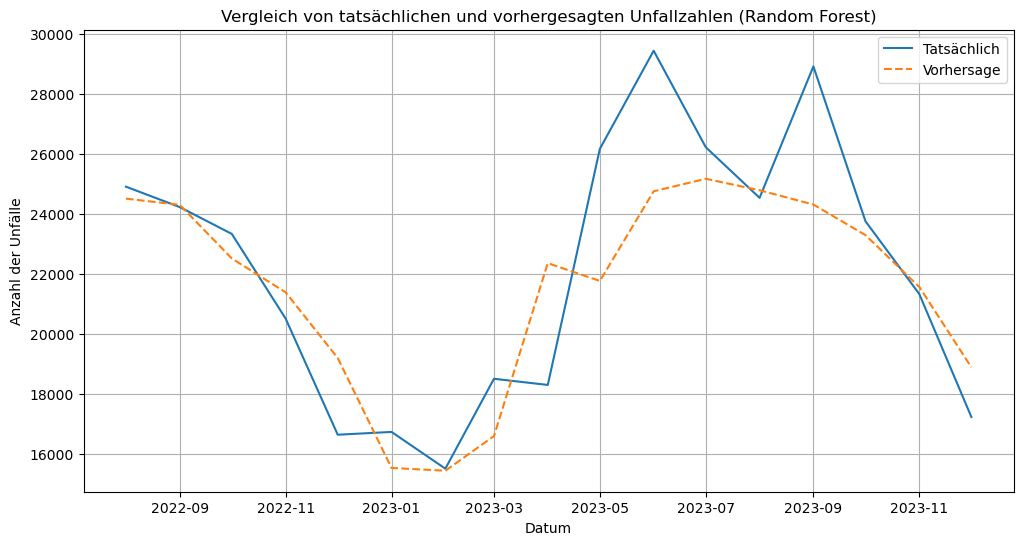

In [20]:
import matplotlib.pyplot as plt

# Erstellen eines DataFrames mit tatsächlichen und vorhergesagten Werten
predictions_rf = pd.DataFrame({'Tatsächlich': y_test, 'Vorhersage': y_pred_rf}, index=y_test.index)

# Plotten der tatsächlichen und vorhergesagten Werte
plt.figure(figsize=(12, 6))
plt.plot(predictions_rf.index, predictions_rf['Tatsächlich'], label='Tatsächlich')
plt.plot(predictions_rf.index, predictions_rf['Vorhersage'], label='Vorhersage', linestyle='--')
plt.title('Vergleich von tatsächlichen und vorhergesagten Unfallzahlen (Random Forest)')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Unfälle')
plt.legend()
plt.grid(True)
plt.show()

Die Visualisierung zeigt, wie gut das Modell die allgemeine Tendenz und die `saisonalen Schwankungen` erfasst.

## 4.1 SARIMA Modellierung

An diesem Punkt könnte ich das RandomForest-Modell durch anpassen der Hyperparameter optimieren, um das Modell noch mehr an die Testdaten anzupassen und einen R2-Score von über 70 % zu erreichen. 

Es gibt spezielle Modelle für Zeitreihen, die mit diesen Daten flexibler umgehen können als die bisher trainierten Modelle.

Ich habe mich für `SARIMA (Seasonal ARIMA)` entschieden. SARIMA erweitert `ARIMA (AutoRegressive Integrated Moving Average)` mit saisonalen Kompoeneten um `zyklische, saisonale Muster wie Jahreszeiten` zu erfassen.
ARIMA verwendet Differenzierung (daher "Integrated") der Zeitreihen, um sie stationär zu machen. ARIMA kombiniert autoregressive, gleitende Mittelwerte und Differenzierung. Entsprechend müssen die Zeitreihen vorbereitet werden, um die Parameter für das ARIMA-Modell abzuschätzen.

Der für die SARIMA-Modellierung verwendete Code kommt aus der Python-Bibliothek statsmodels. Entsprechende Quellenangaben habe ich am Ende des Notebooks hinzugefügt.

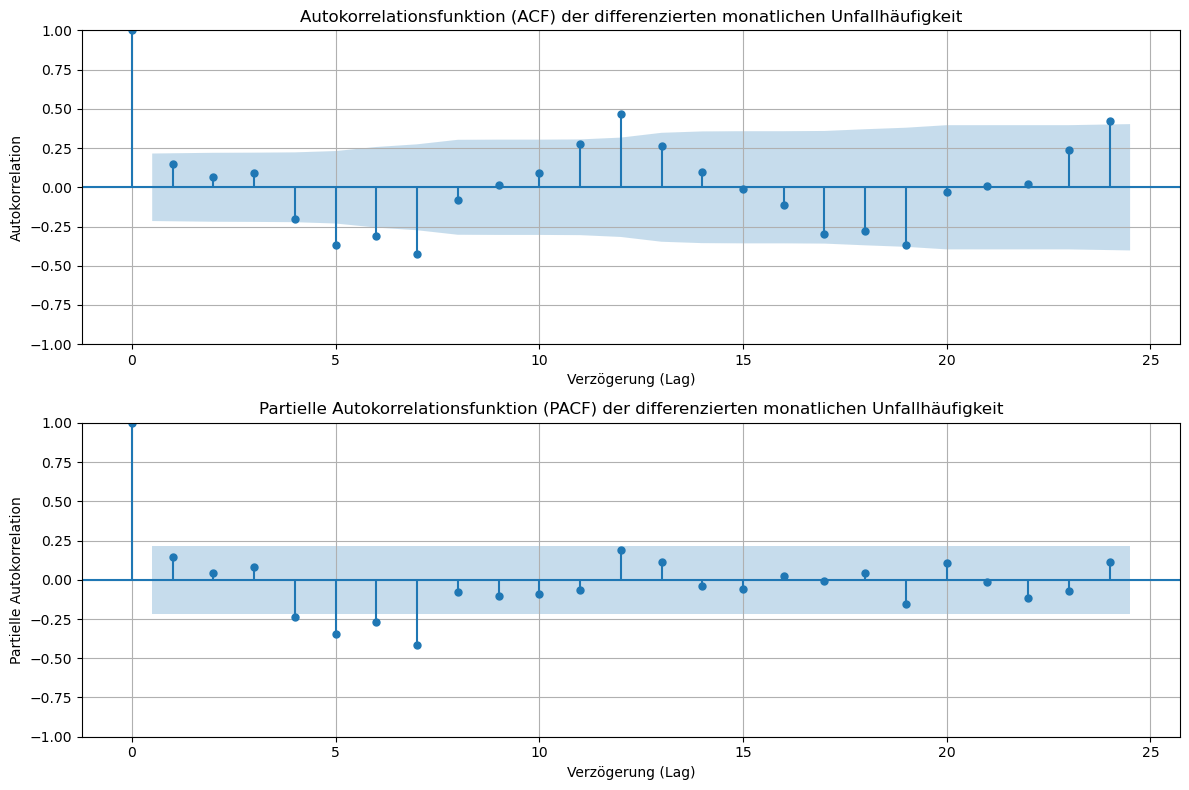

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differenzieren der Zeitreihe
unfall_monatlich_diff = unfall_monatlich['Anzahl_Unfaelle'].diff().dropna()

# Erstellen von ACF- und PACF-Plots der differenzierten Zeitreihe
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(unfall_monatlich_diff, lags=24, ax=plt.gca())
plt.title('Autokorrelationsfunktion (ACF) der differenzierten monatlichen Unfallhäufigkeit')
plt.xlabel('Verzögerung (Lag)')
plt.ylabel('Autokorrelation')
plt.grid(True)

plt.subplot(212)
plot_pacf(unfall_monatlich_diff, lags=24, ax=plt.gca())
plt.title('Partielle Autokorrelationsfunktion (PACF) der differenzierten monatlichen Unfallhäufigkeit')
plt.xlabel('Verzögerung (Lag)')
plt.ylabel('Partielle Autokorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()

Basierend auf diesen Plots werden die Parameter für das ARIMA-Modell abgeschätzt:

Die nicht-saisonalen Parameter
- p (Ordnung des autoregressiven Teils): Aus dem PACF-Plot ist zu entnehmen, das signifikante Peaks, die nach einigen Lags abbrechen auf die Ordnung 'p' hinweisen.

- d (Ordnung der Differenzierung): Da ich die Zeitreihe einmal differenziert habe, um sie stationär zu machen, ist 'd' wahrscheinlich 1.

- q (Ordnung des gleitenden Durchschnitts): ACF-Plot. Signifikante Peaks, die nach einigen Lags abfallen, deuten auf die Ordnung 'q' hin.

Die saisonalen Parameter
- P, D, Q, s (Saisonale Ordnung):  bei saisonalen Lags (z. B. 12, 24) in den ACF- und PACF-Plots.

Hier müssen die entsprechenden Parameter ausprobiert werden.

**(p, d, q)** = (1, 1, 1) sind die nicht-saisonalen Parameter

**(P, D, Q, S)** = (1, 1, 1, 12) sind die saisonalen Parameter

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definieren der SARIMA-Ordnung (p, d, q) und saisonalen Ordnung (P, D, Q, S)
# Beispiel: SARIMA(p=1, d=1, q=1)x(P=1, D=1, Q=1, S=12)
# Diese Parameter sind Schätzungen basierend auf den ACF/PACF Plots und können angepasst werden
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Initialisieren und Trainieren des SARIMA-Modells
# Wir verwenden die gesamte unfall_monatlich Zeitreihe für das Training
model_sarima = SARIMAX(unfall_monatlich['Anzahl_Unfaelle'],
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results_sarima = model_sarima.fit(disp=False)

# Anzeigen der Modellzusammenfassung
print(results_sarima.summary())

/home/cinci/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cinci/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                    Anzahl_Unfaelle   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -521.491
Date:                            Sun, 31 Aug 2025   AIC                           1052.981
Time:                                    21:53:02   BIC                           1063.197
Sample:                                01-01-2017   HQIC                          1056.951
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5240      0.363      1.444      0.149      -0.187       1.235
ma.L1         -0.8026      0.262   

Der nächste Schritt ist, die `Leistung dieses SARIMA-Modells auf dem Testdatensatz` zu bewerten und mit den anderen Modellen zu vergleichen.

In [22]:
# Erstellen von Vorhersagen auf dem Testdatensatz
# Wir verwenden die get_prediction Methode und geben den Start- und Endpunkt für die Vorhersage an
start_index = X_test.index[0]
end_index = X_test.index[-1]

sarima_predictions = results_sarima.get_prediction(start=start_index, end=end_index, dynamic=False)

# Extrahieren der vorhergesagten Werte
y_pred_sarima = sarima_predictions.predicted_mean

# Bewertung des Modells
r2_sarima = r2_score(y_test, y_pred_sarima)

print(f"SARIMA Modell:")
print(f"R-squared (R2): {r2_sarima}")

mae = mean_absolute_error(y_test, y_pred_sarima)
avg_unfaelle = y_test.mean() if hasattr(y_test, "mean") else np.mean(y_test)
mae_pc = mae * 100 / avg_unfaelle if avg_unfaelle != 0 else float('nan')
print(f"Im Mittel liegt die Schätzung um {mae:.2f} Unfälle oder {mae_pc:.1f}% daneben (R²={r2_sarima:.3f})")

SARIMA Modell:
R-squared (R2): 0.8267831001169907
Im Mittel liegt die Schätzung um 1458.18 Unfälle oder 6.6% daneben (R²=0.827)


Vergleichen wir die R2-Werte der von uns evaluierten Modelle auf dem Testdatensatz:

    Linear Regression (12 Lags): R2 = 0.661
    Random Forest Regressor: R2 = 0.692
    GradientBoostingRegressor: R2 = 0.663
    SARIMA Modell: R2 = 0.827

Basierend auf dem R2-Wert auf diesem spezifischen Testdatensatz hat das SARIMA-Modell mit einem R2 von 0.827 die beste Leistung erzielt.

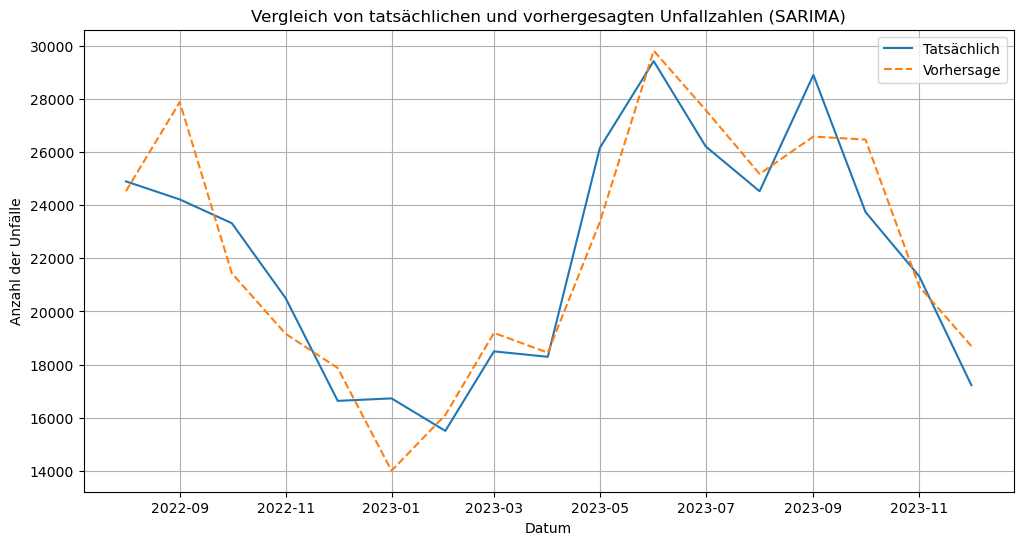

In [23]:
import matplotlib.pyplot as plt

# Erstellen eines DataFrames mit tatsächlichen und vorhergesagten Werten für SARIMA
predictions_sarima = pd.DataFrame({'Tatsächlich': y_test, 'Vorhersage': y_pred_sarima}, index=y_test.index)

# Plotten der tatsächlichen und vorhergesagten Werte
plt.figure(figsize=(12, 6))
plt.plot(predictions_sarima.index, predictions_sarima['Tatsächlich'], label='Tatsächlich')
plt.plot(predictions_sarima.index, predictions_sarima['Vorhersage'], label='Vorhersage', linestyle='--')
plt.title('Vergleich von tatsächlichen und vorhergesagten Unfallzahlen (SARIMA)')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Unfälle')
plt.legend()
plt.grid(True)
plt.show()

Das Diagramm zeigt, dass das SARIMA-Modell die Unfallzahlen auf dem 
Tesdatensatz gut vorhersagt.

## 4.2 SARIMA Modelloptmierungen

Da das `SARIMA-Modell die besten Ergebnisse` liefert, wähle ich dieses `Modell für weitere Optimierungen`.

Ich habe das SARIMA-Modell derzeit mit den Parametern (1, 1, 1)x(1, 1, 1, 12) trainiert.

Um die Parameter zu optimieren, können wir verschiedene Kombinationen von p, d, q, P, D, Q und S ausprobieren und die Modelle anhand von Kriterien wie dem AIC (Akaike Information Criterion) oder BIC (Bayesian Information Criterion) vergleichen. Modelle mit niedrigeren AIC- oder BIC-Werten werden in der Regel bevorzugt.

Durch einen Gittersuchlauf über einen Bereich von möglichen Werten für die nicht-saisonalen Parameter (p, d, q) und die saisonalen Parameter (P, D, Q) kann für jede Kombination ein SARIMA-Modell trainiert werden. Ich werden die Modelle anhand des AIC (Akaike Information Criterion) bewerten und die Parameter mit dem niedrigsten AIC auswählen, da ein niedrigerer AIC-Wert auf ein besseres Modell hindeutet.

Da dieser Prozess einige Zeit in Anspruch nehmen kann, werde ich einen begrenzten Bereich für die Parameter wählen.

In [24]:
import itertools
import warnings


# Definieren der Bereiche für die Parameter (p, d, q) und (P, D, Q)
p = d = q = range(0, 2)  # Beispiel: Werte 0 oder 1
P = D = Q = range(0, 2)  # Beispiel: Werte 0 oder 1
s = 12  # Saisonale Periode

# Erstellen aller möglichen Parameterkombinationen
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

warnings.filterwarnings("ignore") # Ignoriere Warnungen

best_aic = float("inf")
best_order = None
best_seasonal_order = None

print("Suche nach optimalen SARIMA-Parametern...")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(unfall_monatlich['Anzahl_Unfaelle'],
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)

            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal

        except:
            continue

print("\nOptimale SARIMA-Parameter gefunden:")
print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order}")
print(f"Best AIC: {best_aic}")

Suche nach optimalen SARIMA-Parametern...

Optimale SARIMA-Parameter gefunden:
Order: (0, 1, 1), Seasonal Order: (0, 1, 1, 12)
Best AIC: 1050.8207186822442


Der `AIC-Wert` hat sich im Vergleich zu den vorher verwendeten Parametern `leicht verbessert`.

AIC jetzt 1050.83
AIC vorher 1052.98

Hat sich dies auf die Vohersagen auf dem Testdatensatz ausgewirkt?

In [25]:
# Trainieren des SARIMA-Modells mit den optimalen Parametern
model_sarima_optimized = SARIMAX(unfall_monatlich['Anzahl_Unfaelle'],
                                 order=best_order,
                                 seasonal_order=best_seasonal_order,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

results_sarima_optimized = model_sarima_optimized.fit(disp=False)

print("SARIMA Modell mit optimalen Parametern trainiert.")
print(results_sarima_optimized.summary())

SARIMA Modell mit optimalen Parametern trainiert.
                                     SARIMAX Results                                      
Dep. Variable:                    Anzahl_Unfaelle   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -522.410
Date:                            Sun, 31 Aug 2025   AIC                           1050.821
Time:                                    21:54:46   BIC                           1056.950
Sample:                                01-01-2017   HQIC                          1053.203
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3323      0.125     -2.652      0.008      -0.5

In [26]:
# Erstellen von Vorhersagen auf dem Testdatensatz
# Wir verwenden die get_prediction Methode und geben den Start- und Endpunkt für die Vorhersage an
start_index = X_test.index[0]
end_index = X_test.index[-1]

sarima_predictions = results_sarima.get_prediction(start=start_index, end=end_index, dynamic=False)

# Extrahieren der vorhergesagten Werte
y_pred_sarima = sarima_predictions.predicted_mean

# Bewertung des Modells
r2_sarima = r2_score(y_test, y_pred_sarima)

print(f"SARIMA Modell:")
print(f"R-squared (R2): {r2_sarima}")

mae = mean_absolute_error(y_test, y_pred_sarima)
avg_unfaelle = y_test.mean() if hasattr(y_test, "mean") else np.mean(y_test)
mae_pc = mae * 100 / avg_unfaelle if avg_unfaelle != 0 else float('nan')
print(f"Im Mittel liegt die Schätzung um {mae:.2f} Unfälle oder {mae_pc:.1f}% daneben (R²={r2_sarima:.3f})")

SARIMA Modell:
R-squared (R2): 0.8267831001169907
Im Mittel liegt die Schätzung um 1458.18 Unfälle oder 6.6% daneben (R²=0.827)


Die Optimierung der Parameter führt nicht zu einem besseren R2-Wert.

Die Modellgüte mit den Anfangparameter ist gut genug.

# 5. Prognose der Unfallhäufigkeit

## 5.1 Prognoseerstellung für 2024 - 2026

Daher werde ich das trainierte SARIMA Modell verwenden, um die monatliche Unfallhäufigkeit mit Personenschaden für die Jahre 2024 bis 2026 vorherzusagen.

In [27]:
# Erstellen des Datumsindex für die Vorhersageperiode (2025 und 2026)
forecast_start_date = '2024-01-01'
forecast_end_date = '2026-12-01'
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')

# Sicherstellen, dass der Vorhersageindex nach dem letzten Datum in den Trainingsdaten beginnt
if forecast_index[0] <= unfall_monatlich.index[-1]:
    forecast_index = pd.date_range(start=unfall_monatlich.index[-1] + pd.offsets.MonthBegin(1),
                                   end=forecast_end_date, freq='MS')


# Erstellen der Prognose
forecast = results_sarima_optimized.predict(start=forecast_index[0], end=forecast_index[-1])

print("\nMonatliche Unfallhäufigkeit Prognose für 2025 und 2026:")
display(forecast)


Monatliche Unfallhäufigkeit Prognose für 2025 und 2026:


2024-01-01    16722.819410
2024-02-01    15854.556558
2024-03-01    18937.871164
2024-04-01    18917.141980
2024-05-01    25589.199240
2024-06-01    28550.810153
2024-07-01    26474.597951
2024-08-01    25198.549369
2024-09-01    27911.393292
2024-10-01    24319.694579
2024-11-01    21522.059319
2024-12-01    17961.690432
2025-01-01    17285.876386
2025-02-01    16417.613534
2025-03-01    19500.928140
2025-04-01    19480.198956
2025-05-01    26152.256216
2025-06-01    29113.867129
2025-07-01    27037.654927
2025-08-01    25761.606345
2025-09-01    28474.450268
2025-10-01    24882.751555
2025-11-01    22085.116295
2025-12-01    18524.747408
2026-01-01    17848.933362
2026-02-01    16980.670511
2026-03-01    20063.985117
2026-04-01    20043.255932
2026-05-01    26715.313192
2026-06-01    29676.924105
2026-07-01    27600.711904
2026-08-01    26324.663322
2026-09-01    29037.507244
2026-10-01    25445.808531
2026-11-01    22648.173271
2026-12-01    19087.804384
Freq: MS, Name: predicted_me

## 5.2 Visualisierung der Prognose

Wir können die historischen Daten und die Prognose visualisieren, um die vorhergesagten Trends und saisonalen Muster zu sehen.

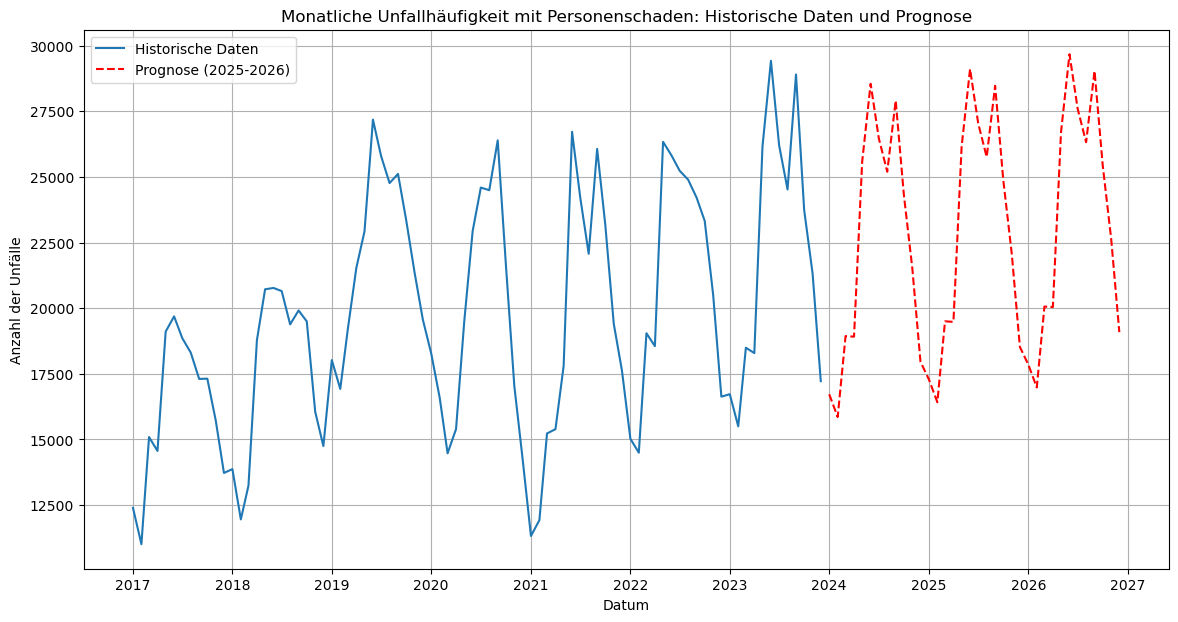

In [28]:
# Plotten der historischen Daten und der Prognose
plt.figure(figsize=(14, 7))
plt.plot(unfall_monatlich['Anzahl_Unfaelle'], label='Historische Daten')
plt.plot(forecast, label='Prognose (2025-2026)', color='red', linestyle='--')
plt.title('Monatliche Unfallhäufigkeit mit Personenschaden: Historische Daten und Prognose')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Unfälle')
plt.legend()
plt.grid(True)
plt.show()

# 6. Fazit und Ausblick

Die Analyse der Unfalldaten mit Personenschaden hat gezeigt, dass die monatliche Unfallhäufigkeit saisonale Muster und Trends aufweist. Durch die Vorverarbeitung der Daten, einschließlich der Imputation fehlender Werte, der Transformation zyklischer Merkmale und der Anwendung von One-Hot-Encoding, konnte ich die Daten für die Modellierung aufbereiten.

Ich habe verschiedene Regressionsmodelle evaluiert. Das **SARIMA-Modell** zeigte dabei eine signifikant bessere Leistung bei der Vorhersage der monatlichen Unfallzahlen auf dem Testdatensatz (R2 = 0.827) im Vergleich zu den anderen untersuchten Modellen wie Linear Regression (R2 = 0.661) und Random Forest Regressor (R2 = 0.692). Dies liegt hauptsächlich daran, dass SARIMA speziell für die Modellierung von Zeitreihendaten mit saisonalen Komponenten entwickelt wurde und somit die im Datensatz vorhandenen saisonalen Muster und Autokorrelationen besser erfassen konnte als die generischeren Regressionsmodelle.

Das trainierte und optimierte SARIMA-Modell habe ich verwendet, um die monatliche Unfallhäufigkeit mit Personenschaden für die Jahre 2024 bis 2026 zu prognostizieren. Die Prognose zeigt weiterhin die identifizierten saisonalen Schwankungen, was die Fähigkeit des Modells zur Extrapolation dieser Muster in die Zukunft unterstreicht.

**Ausblick:**

* **Modellvalidierung:** Es ist wichtig, die Prognose mit den tatsächlich eintretenden Unfallzahlen in den Jahren 2024-2026 zu vergleichen, um die Genauigkeit des Modells in der Praxis zu bewerten.
* **Regelmäßiges Retraining:** Um die Prognosequalität aufrechtzuerhalten, sollte das Modell regelmäßig mit neuen, aktuellen Unfalldaten neu trainiert werden.
* **Einbeziehung weiterer Merkmale:** Zukünftige Arbeiten könnten die Einbeziehung weiterer potenziell relevanter Merkmale untersuchen, wie z.B. Wetterbedingungen, Feiertage, Schulferien oder spezifische regionale Besonderheiten (basierend auf dem AGS), um die Prognosegenauigkeit weiter zu verbessern.
* **Vergleich mit anderen Zeitreihenmodellen:** Es könnten auch andere fortgeschrittene Zeitreihenmodelle oder Machine-Learning-Ansätze, die speziell für Zeitreihen entwickelt wurden (z.B. Prophet, LSTM-Netzwerke), evaluiert werden, um festzustellen, ob diese eine überlegene Leistung erzielen, insbesondere bei komplexeren Mustern oder längeren Vorhersagehorizonten.
* **Regionale Analysen:** Eine detailliertere Analyse könnte auf regionaler Ebene durchgeführt werden, um spezifische Muster und Prognosen für einzelne Bundesländer oder Gemeinden zu erstellen, was für lokale Behörden von großem Interesse wäre.

### Quellenangaben

Der für die SARIMA-Modellierung verwendete Code basiert auf der Python-Bibliothek `statsmodels`. Hier sind die Quellen für die relevanten Funktionen und Konzepte:

*   **SARIMAX-Modell:** Die Implementierung des saisonalen ARIMA-Modells (`SARIMAX`) in `statsmodels`.
    [https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

*   **Autokorrelationsfunktion (ACF) Plot:** Visualisierung der Autokorrelation.
    [https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)

*   **Partielle Autokorrelationsfunktion (PACF) Plot:** Visualisierung der partiellen Autokorrelation.
    [https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html)

*   **Allgemeine Informationen zur Zeitreihenanalyse in statsmodels:**
    [https://www.statsmodels.org/stable/tsa.html](https://www.statsmodels.org/stable/tsa.html)

Für Datenanalyse, Visualisierung und Zeitreihen in Pandas:

*   McKinney: Python for Data Analysis. 3rd Edition, O'Reilly Media, 2022. ISBN: 978-1-492-08623-7
